In [1]:
import numpy as np
import pandas as pd
import requests
import glob
import openpyxl
import os
import matplotlib.pyplot as plt
from PIL.ImageColor import colormap
from matplotlib.pyplot import colorbar
from pandas.plotting import table
import matplotlib.ticker as mticker
import seaborn as sns


In [2]:
def summarize_df(df, n=5):
    if df.shape[0] > 2 * n:
        top_rows = df.head(n)
        bottom_row = df.tail(1)
        ellipsis_row = pd.DataFrame([['...'] * df.shape[1]], columns=df.columns)
        summarized_df = pd.concat([top_rows, ellipsis_row, bottom_row], ignore_index=True)
    else:
        summarized_df = df

    if df.shape[1] > 2 * n:
        first_cols = summarized_df.iloc[:, :n]
        last_col = summarized_df.iloc[:, -1:]
        ellipsis_col = pd.DataFrame([['...']] * summarized_df.shape[0], columns=['...'])
        summarized_df = pd.concat([first_cols, ellipsis_col, last_col], axis=1)
    
    return summarized_df

In [3]:
def cartoon_making(cartoon_df,number):   
    fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the size as needed
    ax.xaxis.set_visible(False)  # Hide the x-axis
    ax.yaxis.set_visible(False)  # Hide the y-axis
    ax.set_frame_on(False)  # No visible frame
    
    # Create the table without the index
    tbl = table(ax, cartoon_df, loc='center', cellLoc='center', colWidths=[0.2]*cartoon_df.shape[1])
    
    # Remove the index from the table
    tbl.auto_set_column_width([i for i in range(len(cartoon_df.columns))])
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(20)
    tbl.scale(5, 5)  # Set the table scale
    
    # Hide the index
    tbl.scale(5, 1)  # Set the table scale
    for key, cell in tbl.get_celld().items():
        if key[0] == 0:
            cell.set_text_props(weight='bold')
        if key[1] == -1:
            cell.set_visible(False)
    
    # Adjust layout to make room for the title
    plt.subplots_adjust(top=0.5)
    # Save the table as an image
    plt.savefig(os.path.join('Graphs',f'short_table{number}.png'), bbox_inches='tight', dpi=300)
    plt.show()

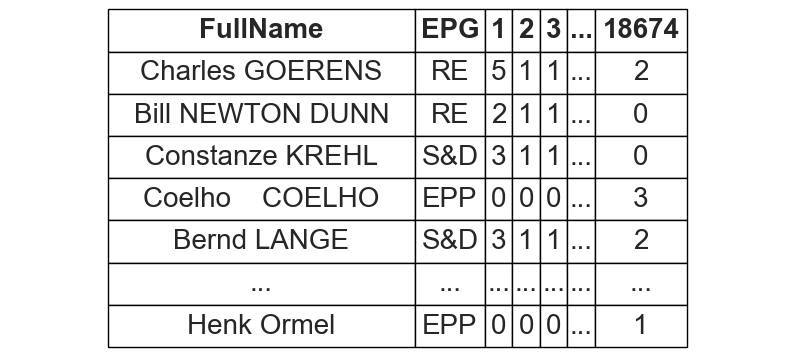

In [4]:
votes9 = pd.read_csv(os.path.join("Cleaned_data", "EP9_clean_data", "matrix_ep9_votes.csv"))
mep_names9 = pd.read_csv(os.path.join("Cleaned_data", "EP9_clean_data", "mep_info_for_wnominate.csv"))
votes9 = votes9.fillna(0)
votes9 = votes9.astype(int)
votes9 = votes9.iloc[:, 1:]
mep_names9 = mep_names9[["FullName", "EPG"]]
mep_info9 = pd.concat([mep_names9, votes9], axis=1)
cartoon_df9 = summarize_df(mep_info9)
cartoon_making(cartoon_df9, 9)

In [5]:
data = {
    'EP': ["EP6", "EP7", "EP8","EP9"],
    'Datapoints': [5827060,5937733, 8796216, 16171684],
    'rollcalls': [6199, 6961, 10252,18674],
    'meps': [940,853,858,866]
}
funtable = pd.DataFrame(data)


In [6]:
def format_func(value, tick_number):
    return f'{value * 1e-6:.1f}M'


def fun(df):
    plt.figure(figsize=(15, 15), facecolor='none')  # Set facecolor to None for transparency

    # Create a white grid with black lines
    ax = plt.gca()
    ax.set_axisbelow(True)

    plt.plot(df['EP'], df['Datapoints'], marker='o', linestyle='-', color='#000000', label='Datapoints')

    for i, txt in enumerate(df['Datapoints']):
        plt.annotate(txt, (df['EP'][i], df['Datapoints'][i]), textcoords="offset points", xytext=(0, 10), ha='center',
                     fontsize=20, color='#000000',
                     bbox=dict(boxstyle="square", facecolor="#CCCCCC", edgecolor="#CCCCCC"), alpha=1)

    # Set black lines and labels for plot elements
    ax.spines['bottom'].set_color('#000000')
    ax.spines['top'].set_color('#000000')
    ax.spines['right'].set_color('#000000')
    ax.spines['left'].set_color('#000000')

    ax.tick_params(axis='x', colors='#000000', labelsize=25)  # Set tick labels to size 25
    ax.tick_params(axis='y', colors='#000000', labelsize=25)

    plt.xlabel('EP', fontsize=25, color='#000000')
    plt.ylabel('Number of Datapoints in millions', fontsize=25, color='#000000')
    plt.legend(fontsize=25, labelcolor='#000000')

    ax.grid(True, linestyle='-', axis='both', which='major', color='#000000', linewidth=2)
    ax.tick_params(axis='x', which='both', top=True, bottom=True, left=False, right=False)
    ax.tick_params(axis='y', which='both', top=True, bottom=True, left=False, right=False)

    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_func))

    # Save the plot to a PNG file with transparent background
    plt.savefig(os.path.join('Graphs', 'Datapoints.png'), bbox_inches='tight', dpi=300, transparent=True)
    plt.show()

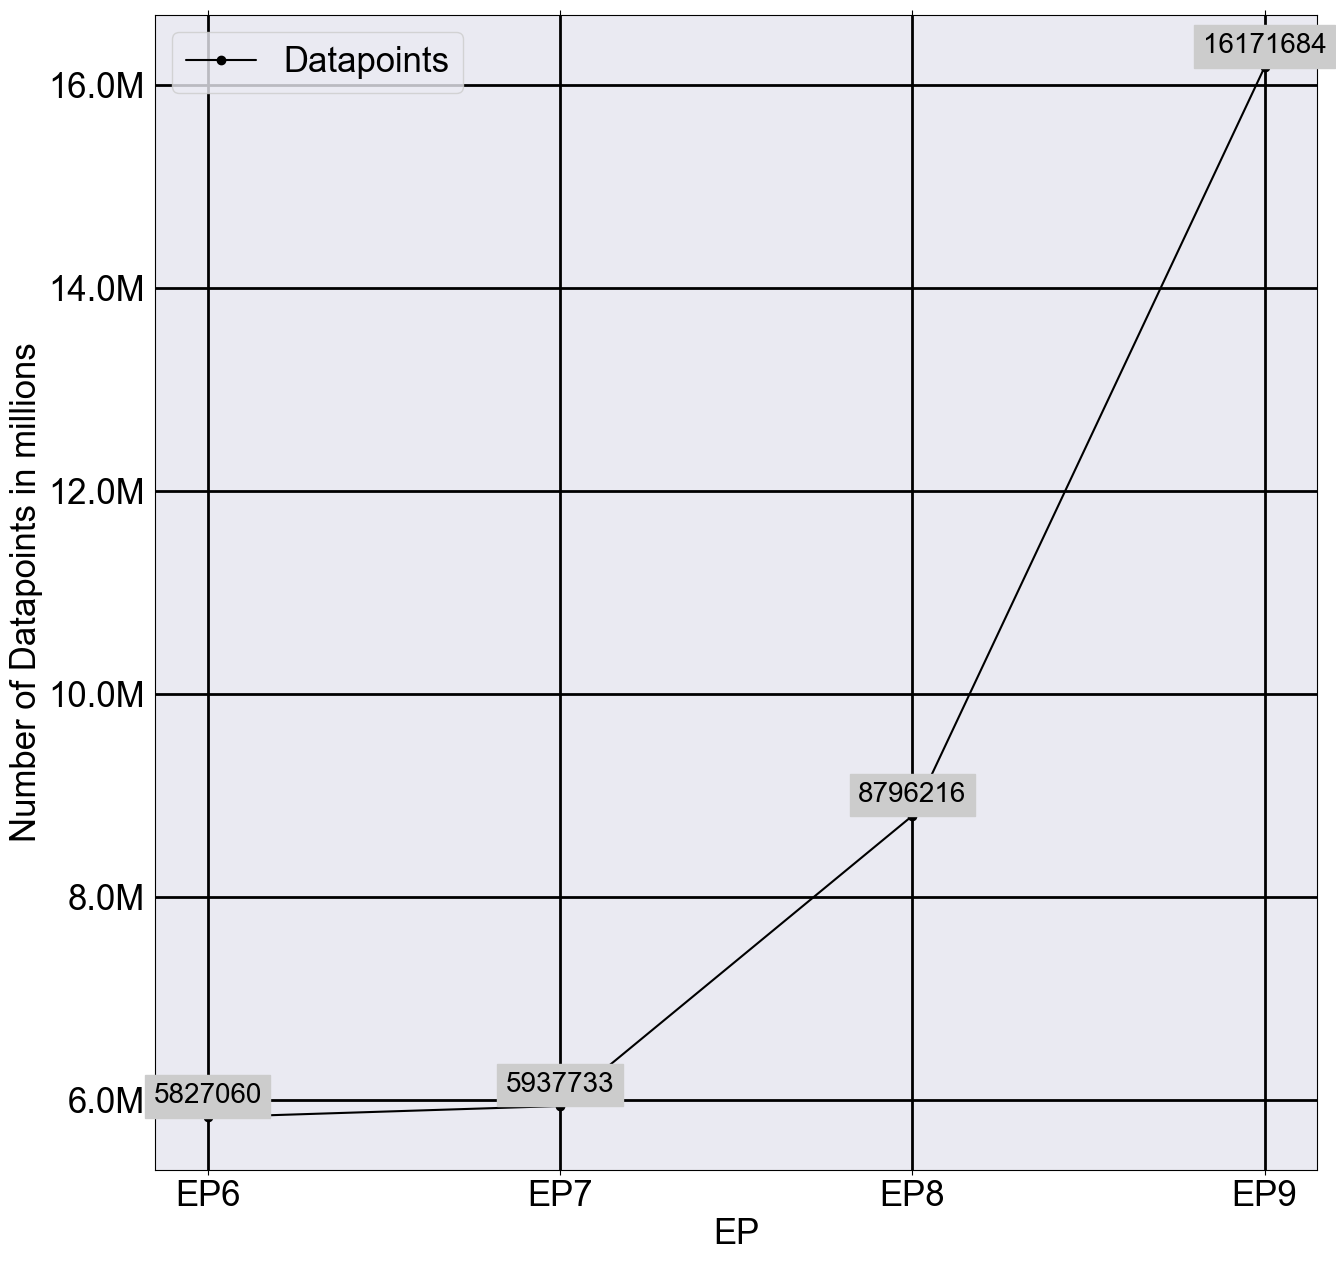

In [7]:
fun(funtable)

In [8]:
wnominate62d = pd.read_csv(os.path.join("Results","EP6","wnominate6.csv"))

In [9]:
wnominate62d

,EPG,coord1D,coord2D
0,GUE–NGL,0.278548,0.960422
1,IND/DEM,-0.084435,0.996429
2,GUE–NGL,0.274476,0.961594
3,EPP-ED,-0.149171,-0.342261
4,NI,-0.879420,0.476046
...,...,...,...
935,PES,0.076032,-0.997105
936,PES,0.079082,-0.996868
937,EPP-ED,-0.165124,-0.462241
938,EPP-ED,-0.157913,-0.237379


In [28]:
def wnominate (df):    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x='coord1D', y='coord2D', hue='EPG', s=100)
    
    # Set labels and title  # Replace 1 with your iteration variable
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    
    # Apply minimal theme
    sns.set(style="whitegrid")
    
    # Add legend
    plt.legend(title="EPG labels",loc='lower right', bbox_to_anchor=(1.01, -0.005), ncol=1)
    plt.savefig(os.path.join("Graphs", "WNOMINATE2d.png"), dpi=300)

    # Show plot
    plt.show()

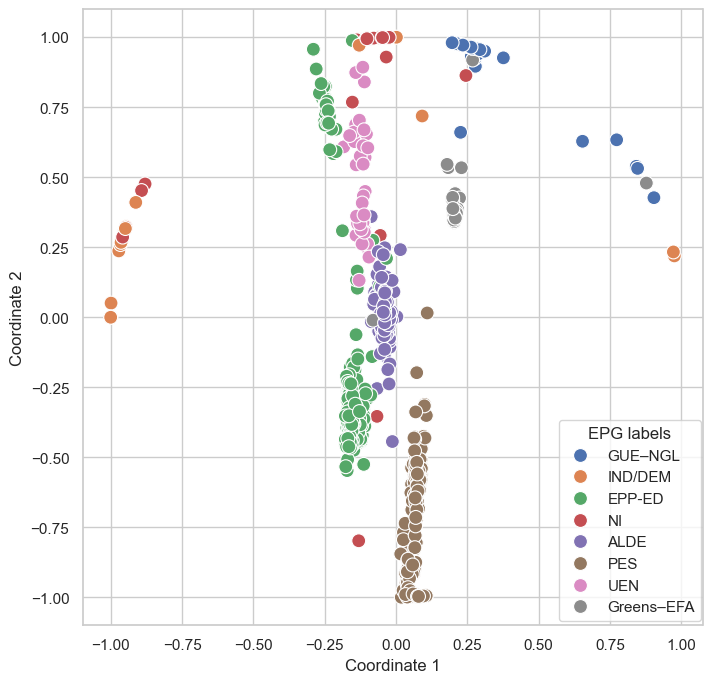

In [29]:
wnominate(wnominate62d)

In [18]:
bd = 'Cleaned_data'
mep_info6 = pd.read_csv(os.path.join(bd, 'EP6_clean_data', 'mep_info_EP_6.csv'))
vote6 = pd.read_csv(os.path.join(bd, 'EP6_clean_data', 'votes_EP_6.csv'))

mep_info7 = pd.read_csv(os.path.join(bd, 'EP7_clean_data', 'mep_info_EP_7.csv'))
vote7 = pd.read_csv(os.path.join(bd, 'EP7_clean_data', 'votes_EP_7.csv'))

mep_info8 = pd.read_csv(os.path.join(bd, 'EP8_clean_data', 'mep_info_EP_8.csv'))
vote8 = pd.read_csv(os.path.join(bd, 'EP8_clean_data', 'votes_EP_8.csv'))

mep_info9 = pd.read_csv(os.path.join(bd, 'EP9_clean_data', 'mep_info_EP_9.csv'))
vote9 = pd.read_csv(os.path.join(bd, 'EP9_clean_data', 'votes_EP_9.csv'))

all_unique_values = np.unique(vote9.values)

choose_columns = ['MepId', 'Country', 'EPG', 'Gender']
mep_info6 = mep_info6[choose_columns]
vote6 = pd.merge(vote6, mep_info6, on="MepId", how="left")
mep_info7 = mep_info7[choose_columns]
vote7 = pd.merge(vote7, mep_info7, on="MepId", how="left")
mep_info8 = mep_info8[choose_columns]
vote8 = pd.merge(vote8, mep_info8, on="MepId", how="left")
mep_info9 = mep_info9[choose_columns]
vote9 = pd.merge(vote9, mep_info9, on="MepId", how="left")
vote9.Vote = vote9['Vote'].astype('Int64')


def recode(vote):
    match vote:
        case 0:
            return vote
        case 1:
            return vote
        case 2:
            return vote
        case 3:
            return vote
        case 4:
            return 4
        case 5:
            return 4
        case 6:
            return 4
    return 0


vote6.Vote = vote6['Vote'].apply(recode)
vote7.Vote = vote7['Vote'].apply(recode)
vote8.Vote = vote8['Vote'].apply(recode)
vote9.Vote = vote9['Vote'].apply(recode)
vote6['Gender'] = vote6['Gender'].apply(lambda x: 'MALE' if x == 'NAP' else x)
vote6missing = vote6[vote6.Vote == 4]
vote7missing = vote7[vote7.Vote == 4]
vote8missing = vote8[vote8.Vote == 4]
vote9missing = vote9[vote9.Vote == 4]
value_counts6 = vote6missing['EPG'].value_counts()
value_counts7 = vote7missing['EPG'].value_counts()
value_counts8 = vote8missing['EPG'].value_counts()
value_counts9 = vote9missing['EPG'].value_counts()

In [63]:
def proportions_plot(df, ep_number):
    epg_counts = df['EPG'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['EPG'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 12))
    proportions.plot(kind='bar',color="k",edgecolor='w')
    plt.xlabel('EPG',fontsize=15)
    plt.ylabel('Proportion of missing votes',fontsize=15)
    plt.savefig(os.path.join('Graphs','proportions_report.png'))
    plt.show()

In [64]:
def genders_plot(df, ep_number):
    epg_counts = df['Gender'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Gender'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 10))
    proportions.plot(kind='bar',color="k",edgecolor='w')
    plt.xlabel('Gender',fontsize=15)
    plt.ylabel('Proportion of missing votes',fontsize=15)
    plt.savefig(os.path.join('Graphs', f'genderreport.png'))
    plt.show()


In [65]:
def countries_plot(df, ep_number):
    epg_counts = df['Country'].value_counts()
    epg_4_votes = df[df['Vote'] == 4]['Country'].value_counts()
    proportions = epg_4_votes / epg_counts

    # Plot
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 10))
    proportions.plot(kind='bar',color="k",edgecolor='w')
    plt.xlabel('Country',fontsize=15)
    plt.ylabel('Proportion of missing votes',fontsize=15)
    plt.savefig(os.path.join('Graphs', f'countryreport.png'))
    plt.show()

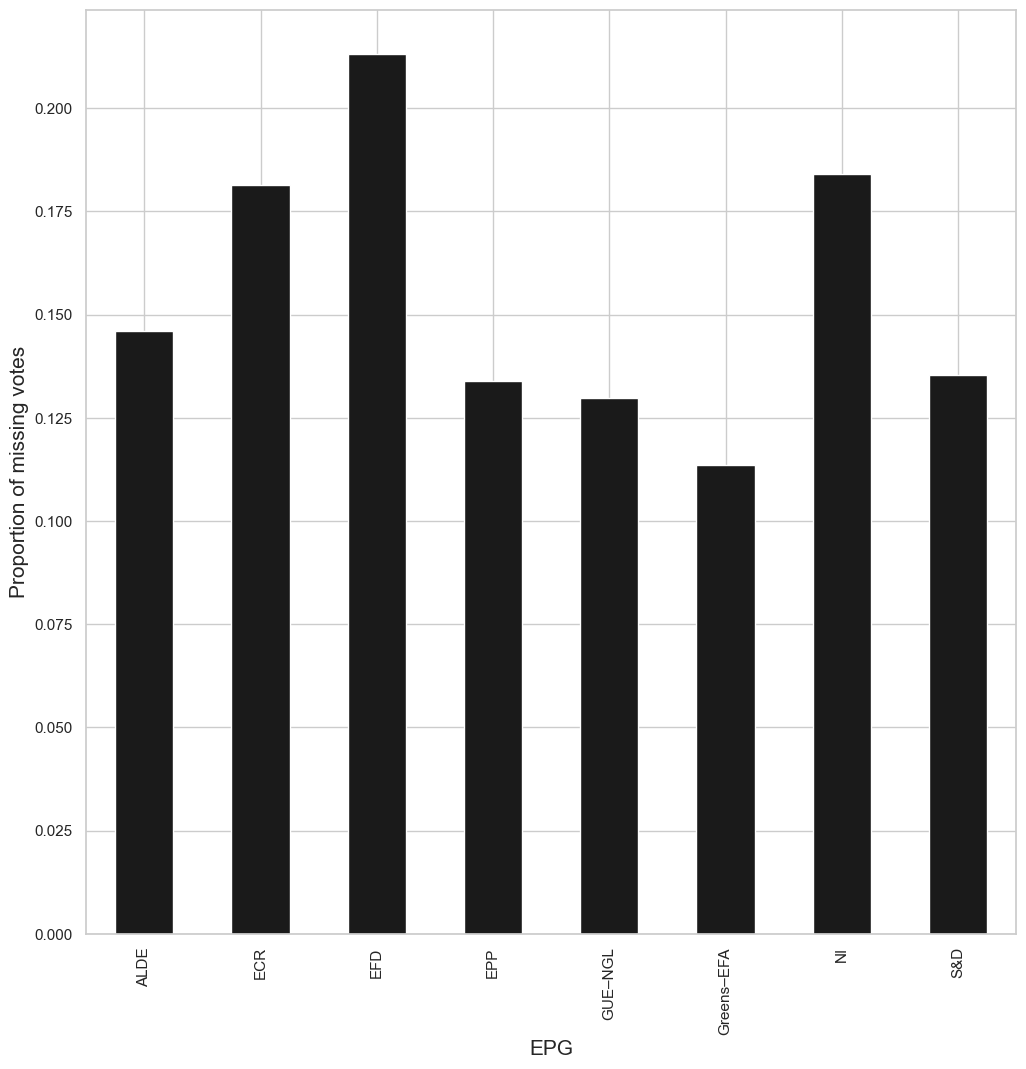

In [66]:
proportions_plot(vote7,7)


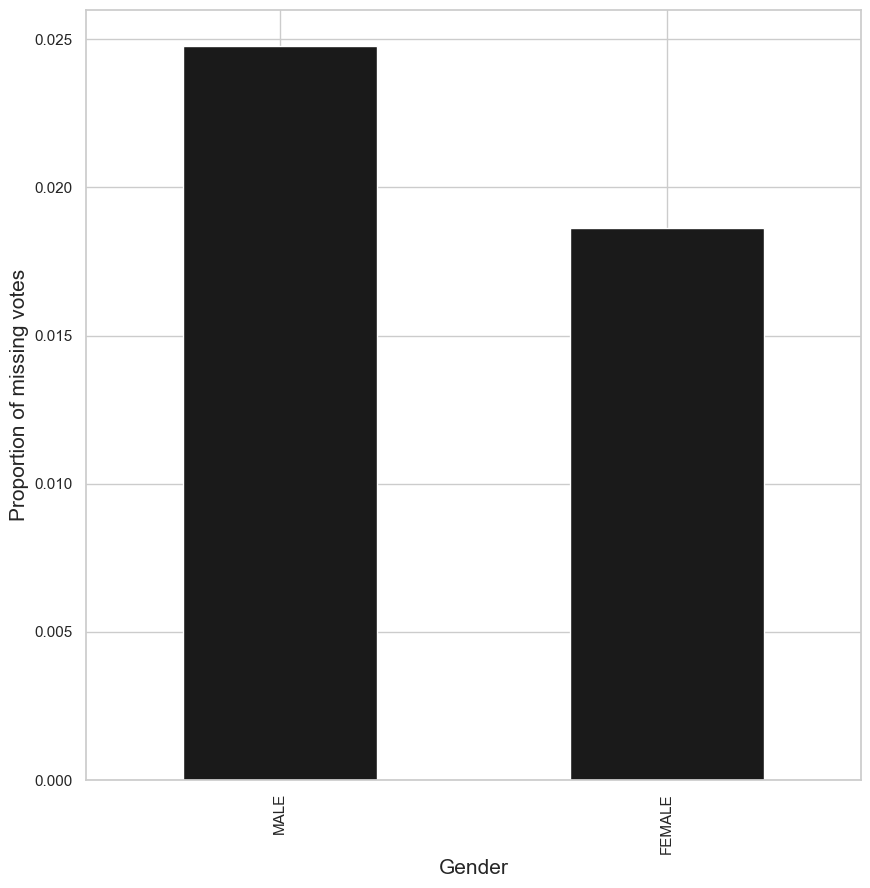

In [67]:
genders_plot(vote9,9)
